In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt

In [3]:
df=pd.read_csv("covid_19_india.csv",parse_dates=['Date'],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
# Selecting columns as required
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
# renaming columns
df.columns=['date','state','cured','deaths','confirmed']

In [5]:
#looking at earliest dates
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
# looking at latest dates
df.tail()

,date,state,cured,deaths,confirmed
4351,2020-07-21,Telangana,34323,422,46274
4352,2020-07-21,Tripura,1845,7,3079
4353,2020-07-21,Uttarakhand,3212,55,4642
4354,2020-07-21,Uttar Pradesh,30831,1192,51160
4355,2020-07-21,West Bengal,26418,1147,44769


In [7]:
#Current Date
today=df[df.date=="2020-07-21"]

In [8]:
# Since want to analyse the recent results
today.head(5)

,date,state,cured,deaths,confirmed
4321,2020-07-21,Andaman and Nicobar Islands,152,0,207
4322,2020-07-21,Andhra Pradesh,24228,696,53724
4323,2020-07-21,Arunachal Pradesh,285,3,790
4324,2020-07-21,Assam,17095,58,25382
4325,2020-07-21,Bihar,17433,217,27646


In [9]:
#max_cases
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
4340,2020-07-21,Maharashtra,175029,12030,318695
4350,2020-07-21,Tamil Nadu,121776,2551,175678
4329,2020-07-21,Delhi,104918,3663,123747
4336,2020-07-21,Karnataka,23795,1403,67420
4322,2020-07-21,Andhra Pradesh,24228,696,53724
4354,2020-07-21,Uttar Pradesh,30831,1192,51160
4331,2020-07-21,Gujarat,35678,2162,49353
4351,2020-07-21,Telangana,34323,422,46274
4355,2020-07-21,West Bengal,26418,1147,44769
4348,2020-07-21,Rajasthan,22195,568,30390


In [10]:
#Top 5 maximum cases
top_states_confirmed=max_confirmed_cases[0:5]
top_states_confirmed

,date,state,cured,deaths,confirmed
4340,2020-07-21,Maharashtra,175029,12030,318695
4350,2020-07-21,Tamil Nadu,121776,2551,175678
4329,2020-07-21,Delhi,104918,3663,123747
4336,2020-07-21,Karnataka,23795,1403,67420
4322,2020-07-21,Andhra Pradesh,24228,696,53724


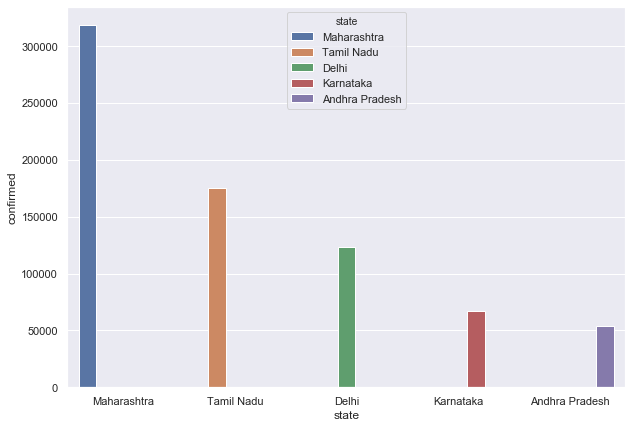

In [11]:
#Making bar_plot for top confirmed states 
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")

In [12]:
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
4340,2020-07-21,Maharashtra,175029,12030,318695
4329,2020-07-21,Delhi,104918,3663,123747
4350,2020-07-21,Tamil Nadu,121776,2551,175678
4331,2020-07-21,Gujarat,35678,2162,49353
4336,2020-07-21,Karnataka,23795,1403,67420
4354,2020-07-21,Uttar Pradesh,30831,1192,51160
4355,2020-07-21,West Bengal,26418,1147,44769
4339,2020-07-21,Madhya Pradesh,15684,738,23310
4322,2020-07-21,Andhra Pradesh,24228,696,53724
4348,2020-07-21,Rajasthan,22195,568,30390


In [13]:
# Top_deaths_cases
max_death_cases=max_death_cases[0:5]
max_death_cases

,date,state,cured,deaths,confirmed
4340,2020-07-21,Maharashtra,175029,12030,318695
4329,2020-07-21,Delhi,104918,3663,123747
4350,2020-07-21,Tamil Nadu,121776,2551,175678
4331,2020-07-21,Gujarat,35678,2162,49353
4336,2020-07-21,Karnataka,23795,1403,67420


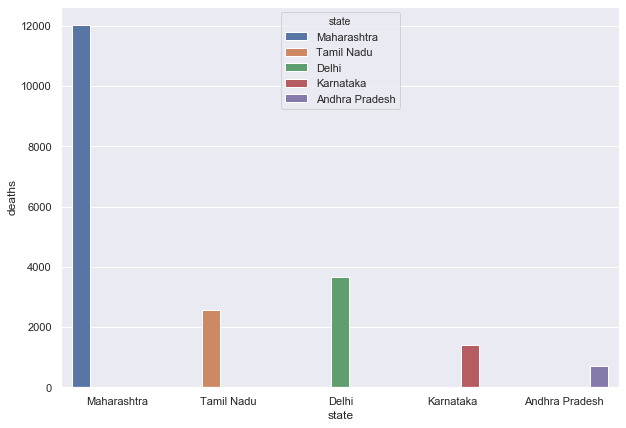

In [14]:
#Making bar_plot for top confirmed states 
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="state",y="deaths",data=top_states_confirmed,hue="state")

In [15]:
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
4340,2020-07-21,Maharashtra,175029,12030,318695
4350,2020-07-21,Tamil Nadu,121776,2551,175678
4329,2020-07-21,Delhi,104918,3663,123747
4331,2020-07-21,Gujarat,35678,2162,49353
4351,2020-07-21,Telangana,34323,422,46274
4354,2020-07-21,Uttar Pradesh,30831,1192,51160
4355,2020-07-21,West Bengal,26418,1147,44769
4322,2020-07-21,Andhra Pradesh,24228,696,53724
4336,2020-07-21,Karnataka,23795,1403,67420
4348,2020-07-21,Rajasthan,22195,568,30390


In [16]:
# maximum cured States
top_cured_states=max_cured_cases[0:5]
top_cured_states

,date,state,cured,deaths,confirmed
4340,2020-07-21,Maharashtra,175029,12030,318695
4350,2020-07-21,Tamil Nadu,121776,2551,175678
4329,2020-07-21,Delhi,104918,3663,123747
4331,2020-07-21,Gujarat,35678,2162,49353
4351,2020-07-21,Telangana,34323,422,46274


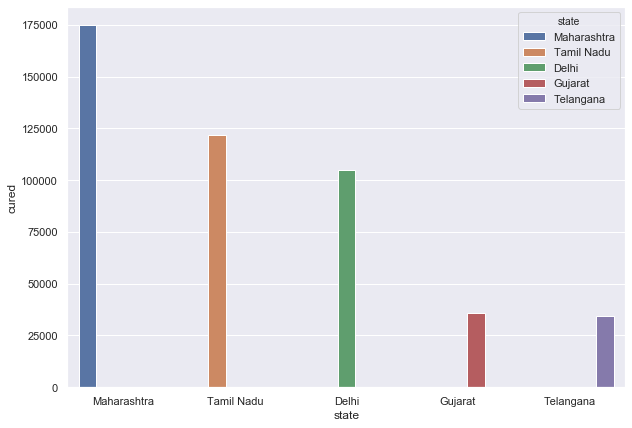

In [17]:
#Making bar_plot for top cured states 
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="state",y="cured",data=top_cured_states,hue="state")

In [18]:
maharashtra=df[df.state=='Maharashtra']
maharashtra

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
4198,2020-07-17,Maharashtra,158140,11194,284281
4234,2020-07-18,Maharashtra,160357,11452,292589
4270,2020-07-19,Maharashtra,165663,11596,300937
4305,2020-07-20,Maharashtra,169569,11854,310455


C:\Users\HP\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


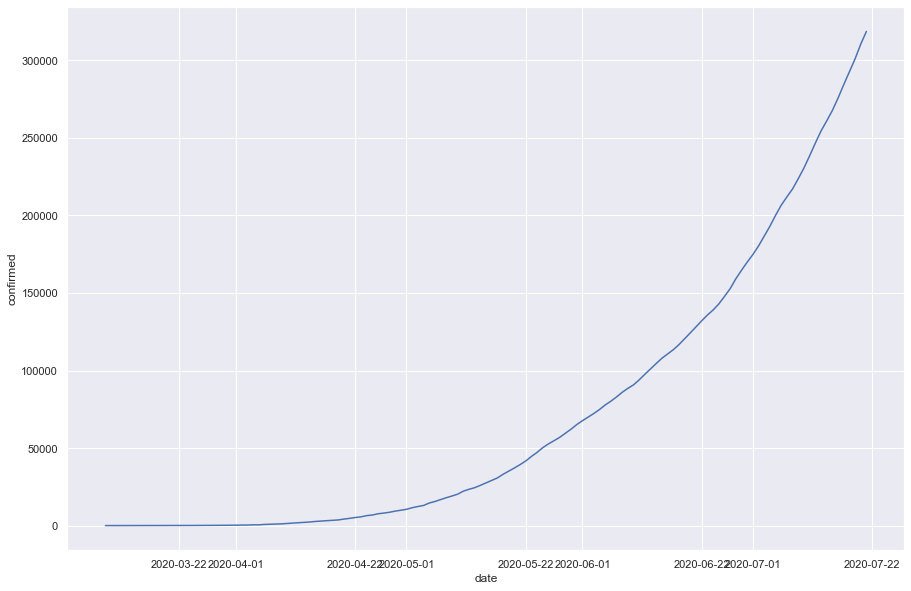

In [19]:
# Visualising confirmed cases in maharashtra
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="confirmed",data=maharashtra,color="b")

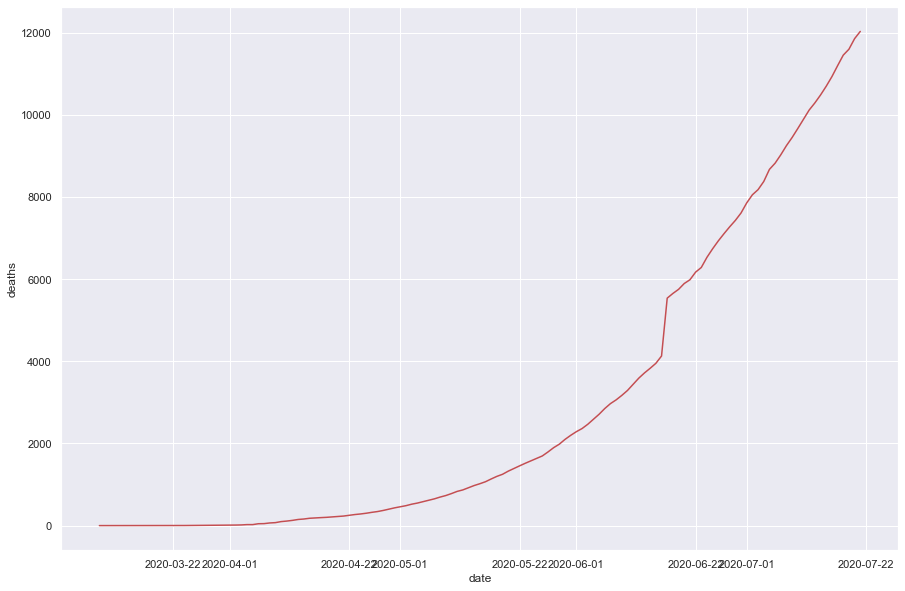

In [20]:
# Visualising confirmed cases in maharashtra
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="deaths",data=maharashtra,color="r")

In [21]:
kerala=df[df.state=="Kerala"]
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
4195,2020-07-17,Kerala,4862,37,10275
4231,2020-07-18,Kerala,4995,38,11066
4267,2020-07-19,Kerala,5199,40,11659
4302,2020-07-20,Kerala,5371,42,12480


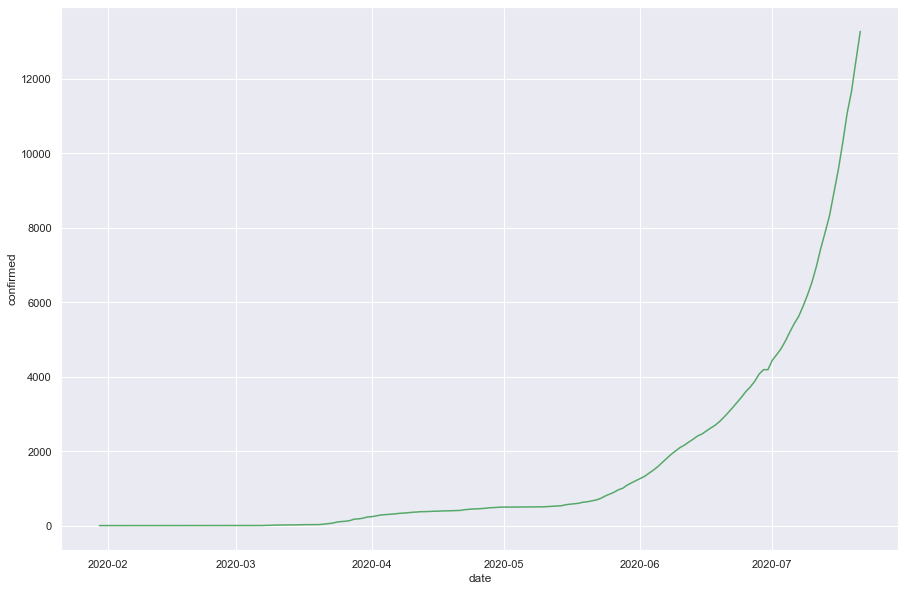

In [22]:
# Visualising confirmed cases in Kerala
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")

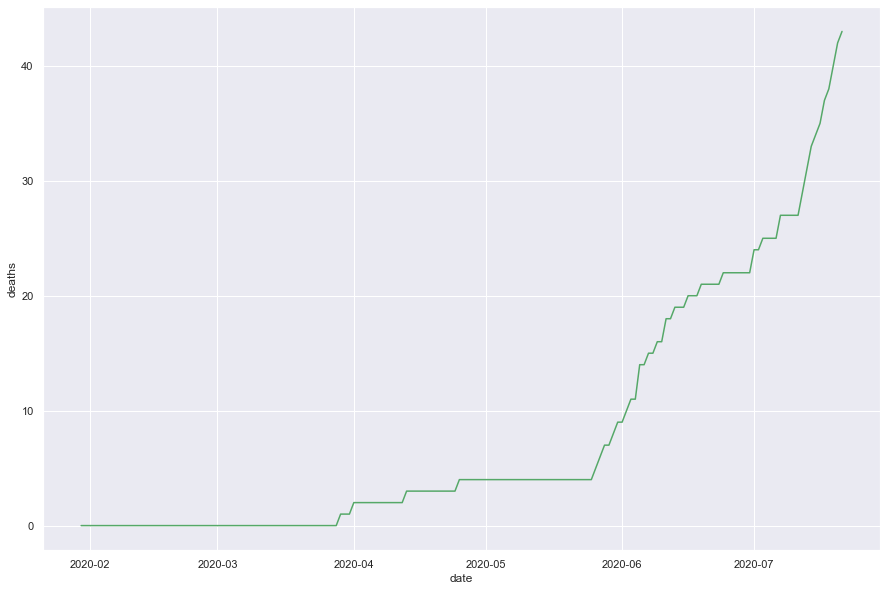

In [23]:
# Visualising deaths cases in Kearla
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="deaths",data=kerala,color="g")

In [27]:
jk=df[df.state=="Jammu and Kashmir"]
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
4192,2020-07-17,Jammu and Kashmir,6446,222,12156
4228,2020-07-18,Jammu and Kashmir,6558,231,12757
4264,2020-07-19,Jammu and Kashmir,7165,236,13198
4299,2020-07-20,Jammu and Kashmir,7811,244,13899


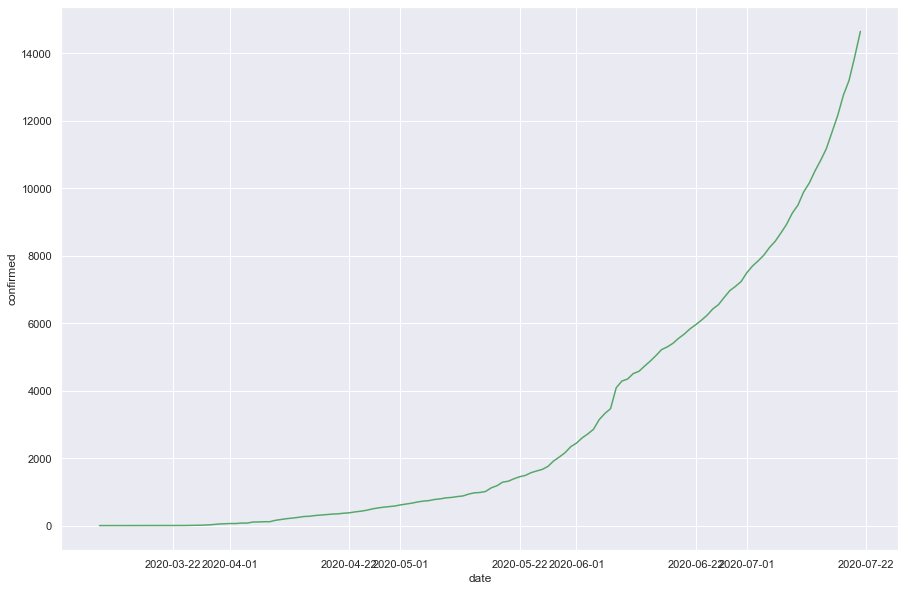

In [28]:
# Visualising confirmed cases in jammu and Kashmir
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")

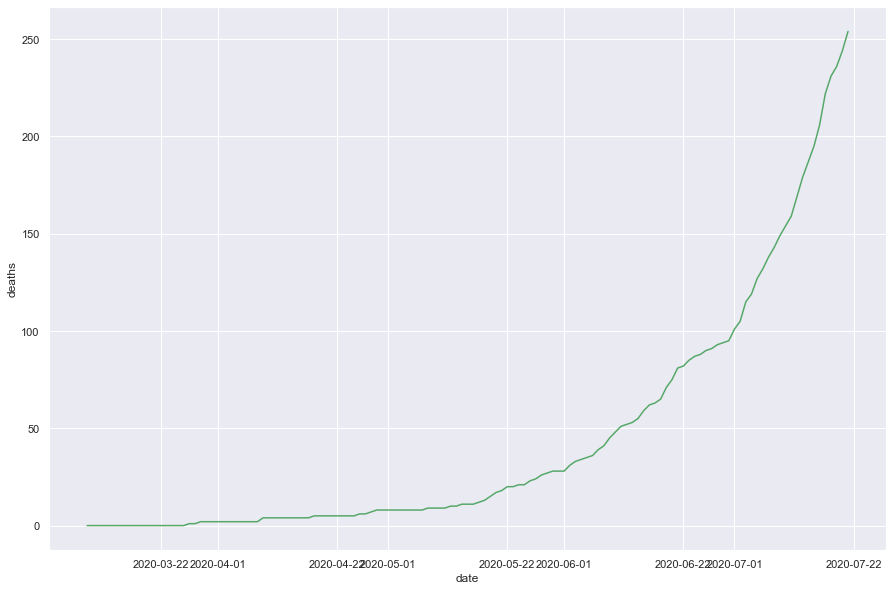

In [29]:
# Visualising confirmed cases in jammu and kashmir
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="deaths",data=jk,color="g")

In [32]:
# checking state-wise test details
test=pd.read_csv("StatewiseTestingDetails.csv")
test

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
3285,2020-07-16,West Bengal,663108.0,NaN,36117.0
3286,2020-07-17,West Bengal,676348.0,NaN,38011.0
3287,2020-07-18,West Bengal,689813.0,NaN,40209.0
3288,2020-07-19,West Bengal,703284.0,NaN,42487.0


In [33]:
test_recent=test[test.Date=='2020-07-17']
test_recent

,Date,State,TotalSamples,Negative,Positive
162,2020-07-17,Andhra Pradesh,1260512.0,1219866,40646.0
254,2020-07-17,Arunachal Pradesh,36426.0,34040,609.0
337,2020-07-17,Assam,614743.0,NaN,20646.0
440,2020-07-17,Bihar,357730.0,NaN,23300.0
542,2020-07-17,Chandigarh,10457.0,9744,660.0
638,2020-07-17,Chhattisgarh,232873.0,NaN,4976.0
820,2020-07-17,Delhi,777125.0,NaN,120107.0
917,2020-07-17,Goa,103527.0,NaN,3304.0
1020,2020-07-17,Gujarat,512000.0,465484,46516.0
1126,2020-07-17,Haryana,424692.0,393627,24797.0


In [34]:
max_test_states=test_recent.sort_values(by="TotalSamples",ascending=False)
max_test_states

,Date,State,TotalSamples,Negative,Positive
2845,2020-07-17,Tamil Nadu,1831304.0,NaN,160907.0
1921,2020-07-17,Maharashtra,1487738.0,1190958,296780.0
3074,2020-07-17,Uttar Pradesh,1379534.0,NaN,NaN
162,2020-07-17,Andhra Pradesh,1260512.0,1219866,40646.0
2665,2020-07-17,Rajasthan,1175379.0,1142148,27789.0
1536,2020-07-17,Karnataka,950177.0,870466,55115.0
820,2020-07-17,Delhi,777125.0,NaN,120107.0
3286,2020-07-17,West Bengal,676348.0,NaN,38011.0
337,2020-07-17,Assam,614743.0,NaN,20646.0
1816,2020-07-17,Madhya Pradesh,567364.0,542222,21082.0


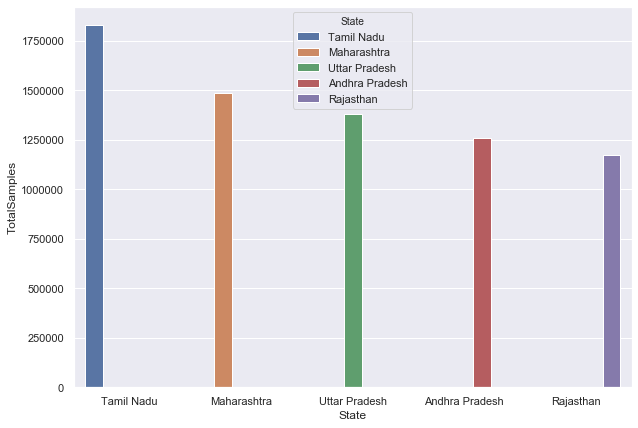

In [37]:
sns.set(rc={"figure.figsize":(10,7)})
sns.barplot(x="State",y="TotalSamples",data=max_test_states[0:5],hue="State")

In [38]:
#Linear Regression
from sklearn.model_selection import train_test_split

In [39]:
maharashtra

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
4198,2020-07-17,Maharashtra,158140,11194,284281
4234,2020-07-18,Maharashtra,160357,11452,292589
4270,2020-07-19,Maharashtra,165663,11596,300937
4305,2020-07-20,Maharashtra,169569,11854,310455


In [40]:
#converting date_time to ordinal
maharashtra['date']=maharashtra['date'].map(dt.datetime.toordinal)
maharashtra.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [53]:
#getting dependent and independent variable
X=maharashtra['date']
y=maharashtra['confirmed']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [61]:
from sklearn.linear_model import LinearRegression 

In [62]:
lr=LinearRegression()

In [63]:
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
maharashtra.tail()

,date,state,cured,deaths,confirmed
4198,737623,Maharashtra,158140,11194,284281
4234,737624,Maharashtra,160357,11452,292589
4270,737625,Maharashtra,165663,11596,300937
4305,737626,Maharashtra,169569,11854,310455
4340,737627,Maharashtra,175029,12030,318695


In [67]:
lr.predict(np.array([[737634]]))

array([[210495.40785503]])